In [ ]:
!pip install diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-fj3_r90g
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-fj3_r90g
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
  Created wheel for RealESRGAN: filename=RealESRGAN-1.0-py3-none-any.whl size=9106 sha256=fd8b7c032b97398d404604970c95b271c66dee8ddc2ec94af5daa7f6f261440d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qj37j8f_/wheels/dd/a3/7d/774508ed192455403be294c8a6c4ad1c83dde8fcdd8903e64a
Successfully built RealESRGAN


In [ ]:
mkdir results

In [ ]:
from diffusers import StableDiffusionPipeline, StableDiffusionXLPipeline
from PIL import Image
from diffusers import  DDIMScheduler, DDPMScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler, EulerAncestralDiscreteScheduler
import torch
from RealESRGAN import RealESRGAN
import numpy as np
import os

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_scale = "4" #@param ["2", "4", "8"] {allow-input: false}

model = RealESRGAN(device, scale=int(model_scale))
model.load_weights(f'weights/RealESRGAN_x{model_scale}.pth')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


RealESRGAN_x4.pth:   0%|          | 0.00/67.0M [00:00<?, ?B/s]

Weights downloaded to: weights/RealESRGAN_x4.pth


In [ ]:
generator = torch.manual_seed(2594089935)
positive_prompt = """photo of an Indian girl standing,
                    mountains, hiking jacket,
                    green trees, woods, RAW photo, natural skin, photorealistic,
                    day, sky,looks at viewer,(cinematic shot, film grain:1.1),
                    Fujiflim XT3, DSLR, 50mm, close up,
                    highly detailed"""

negative_prompt = """"(deformed iris, deformed pupils, deformed lips, deformed nose),
                        semi-realistic, cgi, 3d,
                        render, sketch, cartoon, drawing, anime), text, cropped,
                        out of frame, worst quality, low quality, jpeg artifacts, ugly,
                        duplicate, morbid, mutilated, extra fingers, mutated hands,
                        poorly drawn hands, poorly drawn face, mutation, deformed,
                        blurry, dehydrated, bad anatomy, bad proportions, extra limbs,
                        cloned face, disfigured, gross proportions, malformed limbs,
                        missing arms, missing legs, extra arms, extra legs, fused fingers,
                        too many fingers, long neck"""

In [ ]:
def create_prompt(text, lora="<lora:add_detail:1>"):
    """
    Creates a text prompt with emphasis on photorealism and additional details.
    """
    prompt = f"{text}, {lora} "
    return prompt

#  **Realistic Vision 6**

In [ ]:
pipe1 = StableDiffusionPipeline.from_pretrained("SG161222/Realistic_Vision_V6.0_B1_noVAE")

model_index.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
pipe1.scheduler = DDIMScheduler.from_config(pipe1.scheduler.config)

# Example usage:
image1 = pipe1(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

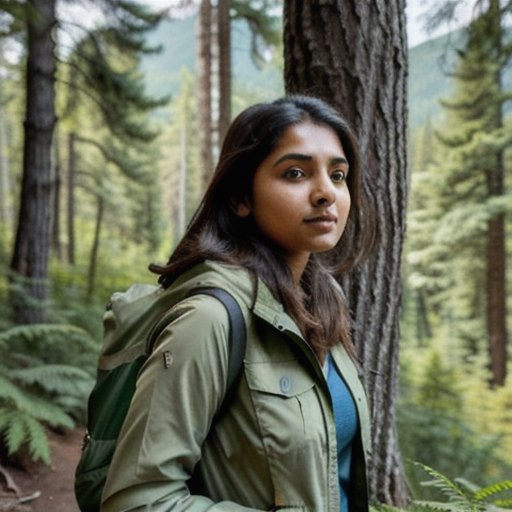

In [ ]:
image1

# To upscale the Image to 2048 we need to use 4x Super Resolution

In [ ]:
result_image_path = os.path.join('./results/', "image1.jpg")
sr_image1 = model.predict(np.array(image1))
sr_image1.save(result_image_path)

In [ ]:
sr_image.size

(2048, 2048)

In [ ]:
pipe1.scheduler = EulerDiscreteScheduler.from_config(pipe1.scheduler.config)
# Example usage:
image2 = pipe1(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

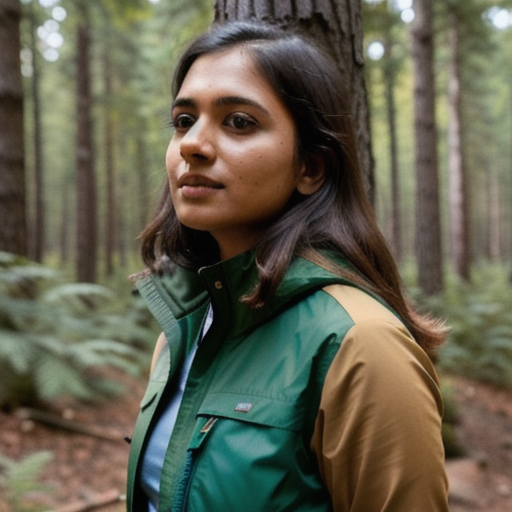

In [ ]:
image2

In [ ]:
result_image_path = os.path.join('./results/', "image2.jpg")
sr_image2 = model.predict(np.array(image2))
sr_image2.save(result_image_path)

In [ ]:
from diffusers import  DDPMScheduler
pipe1.scheduler = DDPMScheduler.from_config(pipe1.scheduler.config)

image3 = pipe1(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

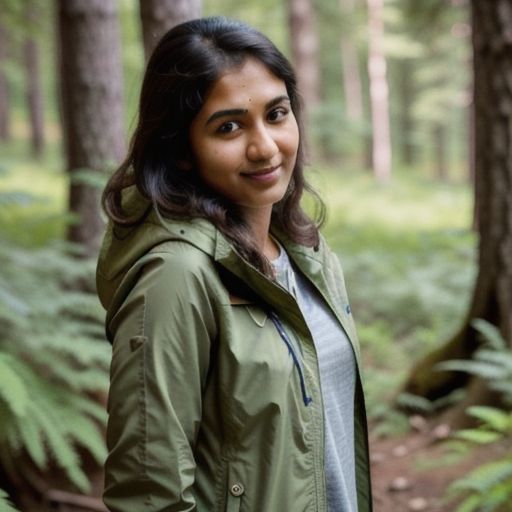

In [ ]:
image3

In [ ]:
result_image_path = os.path.join('./results/', "image3.jpg")
sr_image3 = model.predict(np.array(image3))
sr_image3.save(result_image_path)

In [ ]:
sr_image3

In [ ]:
pipe1.scheduler = DPMSolverMultistepScheduler.from_config(pipe1.scheduler.config)

# Example usage:
image4 = pipe1(prompt= create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

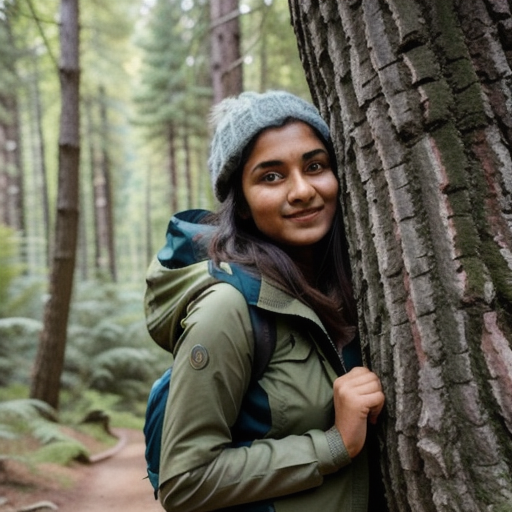

In [ ]:
image4

In [ ]:
result_image_path = os.path.join('./results/', "image4.jpg")
sr_image4 = model.predict(np.array(image4))
sr_image4.save(result_image_path)
sr_image4

In [ ]:
pipe1.to("cuda")
pipe1.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe1.scheduler.config)

# Example usage:
image5 = pipe1(prompt= create_prompt(positive_prompt), negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

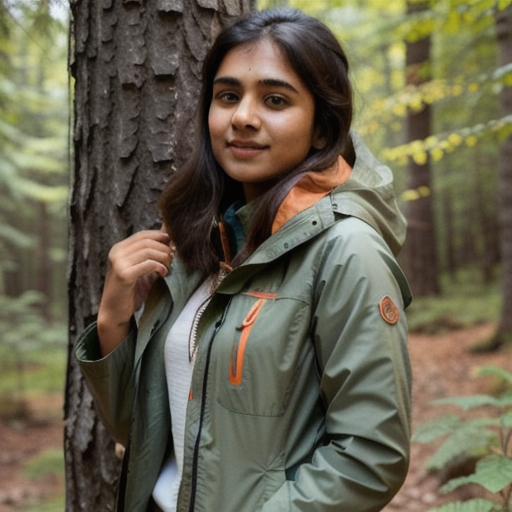

In [ ]:
image5

In [ ]:
result_image_path = os.path.join('./results/', "image5.jpg")
sr_image5 = model.predict(np.array(image5))
sr_image5.save(result_image_path)
sr_image5

# **Epic Realism**

In [ ]:
pipe2 = StableDiffusionPipeline.from_pretrained("stablediffusionapi/epicrealism")

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe2.scheduler = DDIMScheduler.from_config(pipe2.scheduler.config)
# Example usage:
image6 = pipe2(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

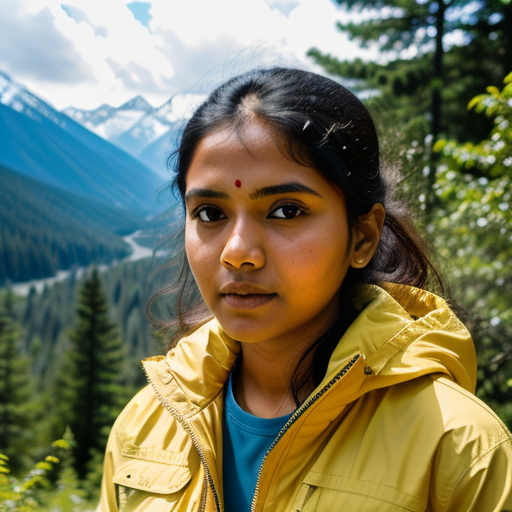

In [ ]:
image6

In [ ]:
result_image_path = os.path.join('./results/', "image6.jpg")
sr_image6= model.predict(np.array(image6))
sr_image6.save(result_image_path)
sr_image6

In [ ]:
from diffusers import  DDPMScheduler
pipe2.scheduler = DDPMScheduler.from_config(pipe2.scheduler.config)
from PIL import Image
# Example usage:
image7 = pipe2(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

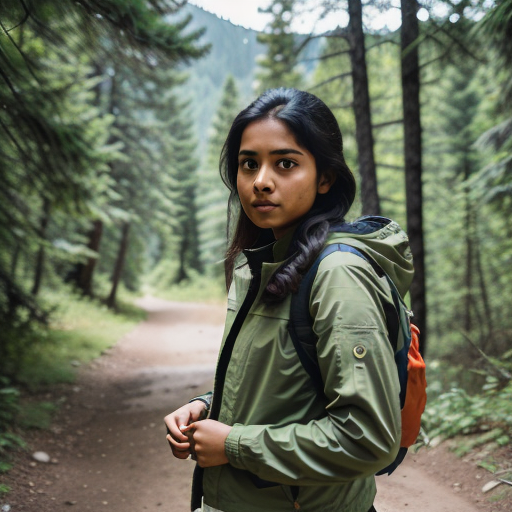

In [ ]:
image7

In [ ]:
result_image_path = os.path.join('./results/', "image7.jpg")
sr_image7= model.predict(np.array(image7))
sr_image7.save(result_image_path)
sr_image7

In [ ]:
pipe2.scheduler = EulerDiscreteScheduler.from_config(pipe2.scheduler.config)
# Example usage:
image8 = pipe2(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

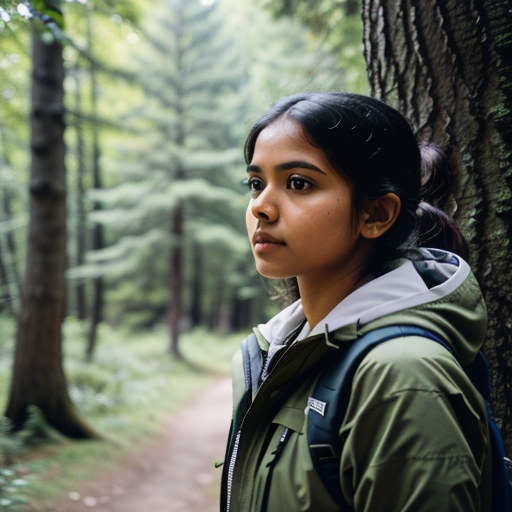

In [ ]:
image8

In [ ]:
result_image_path = os.path.join('./results/', "image8.jpg")
sr_image8= model.predict(np.array(image8))
sr_image8.save(result_image_path)
sr_image8

In [ ]:
pipe2.scheduler = DPMSolverMultistepScheduler.from_config(pipe2.scheduler.config)

# Example usage:
image9 = pipe2(prompt= create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

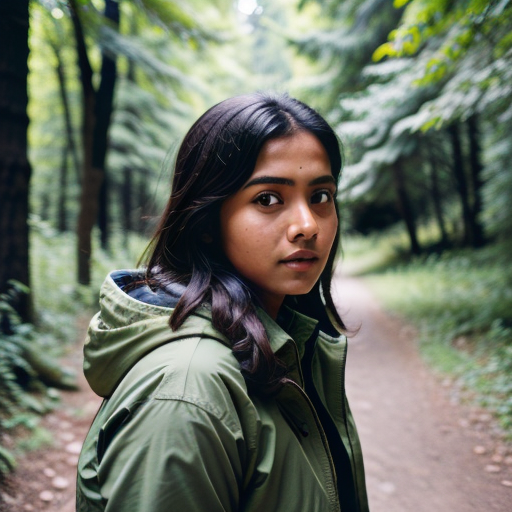

In [ ]:
image9

In [ ]:
result_image_path = os.path.join('./results/', "image9.jpg")
sr_image9= model.predict(np.array(image9))
sr_image9.save(result_image_path)
sr_image9

In [ ]:
pipe2.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe2.scheduler.config)

# Example usage:
image10 = pipe2(prompt= create_prompt(positive_prompt), negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

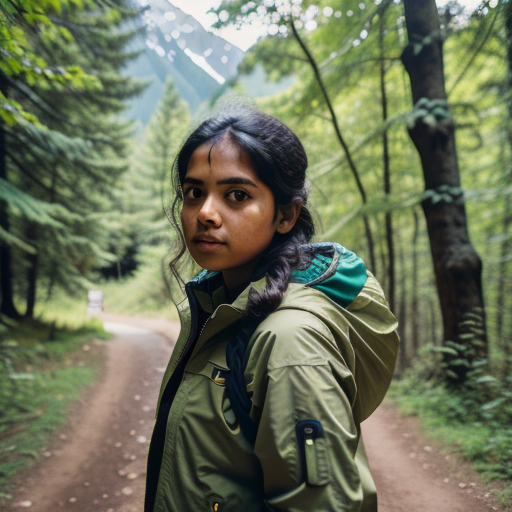

In [ ]:
image10

In [ ]:
result_image_path = os.path.join('./results/', "image10.jpg")
sr_image10= model.predict(np.array(image10))
sr_image10.save(result_image_path)
sr_image10

In [ ]:
pipe3 = StableDiffusionPipeline.from_pretrained("stablediffusionapi/nextphoto")

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
pipe3.scheduler = DDIMScheduler.from_config(pipe3.scheduler.config)
pipe3.to("cuda")
# Example usage:
image11 = pipe3(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

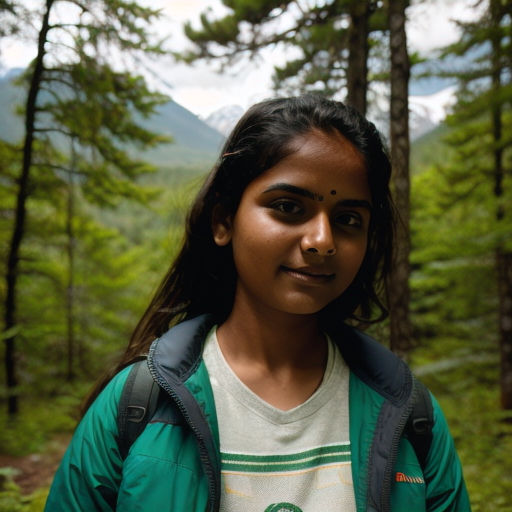

In [ ]:
image11

In [ ]:
result_image_path = os.path.join('./results/', "image11.jpg")
sr_image11= model.predict(np.array(image11))
sr_image11.save(result_image_path)
sr_image11

In [ ]:
pipe3.scheduler = EulerDiscreteScheduler.from_config(pipe3.scheduler.config)
# Example usage:
image12 = pipe3(prompt=create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

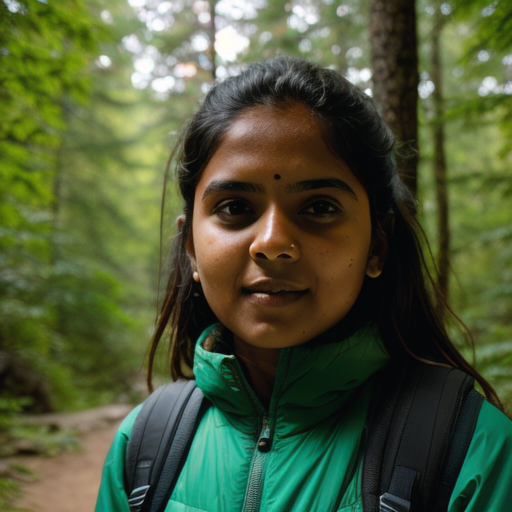

In [ ]:
image12

In [ ]:
result_image_path = os.path.join('./results/', "image12.jpg")
sr_image12= model.predict(np.array(image12))
sr_image12.save(result_image_path)
sr_image12

In [ ]:
pipe3.scheduler = DDPMScheduler.from_config(pipe3.scheduler.config)
# Example usage:
image13 = pipe3(prompt=create_prompt_with_lora(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

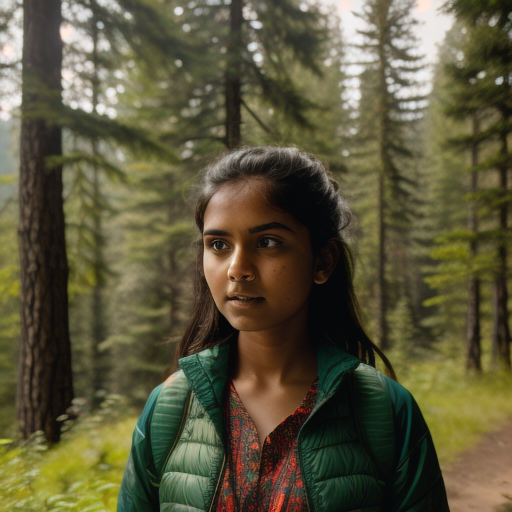

In [ ]:
image13

In [ ]:
result_image_path = os.path.join('./results/', "image13.jpg")
sr_image13= model.predict(np.array(image13))
sr_image13.save(result_image_path)
sr_image13

In [ ]:
pipe3.to("cuda")
pipe3.scheduler = DPMSolverMultistepScheduler.from_config(pipe3.scheduler.config)

# Example usage:
image14 = pipe3(prompt= create_prompt(positive_prompt),negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

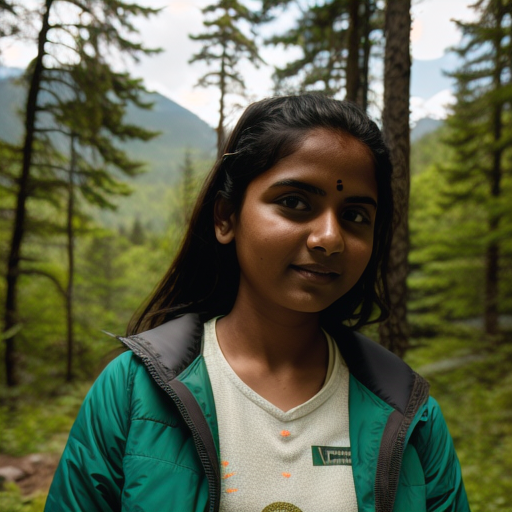

In [ ]:
image14

In [ ]:
result_image_path = os.path.join('./results/', "image14.jpg")
sr_image14= model.predict(np.array(image14))
sr_image14.save(result_image_path)
sr_image14

In [ ]:
pipe3.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe3.scheduler.config)

# Example usage:
image15 = pipe3(prompt= create_prompt(positive_prompt), negative_prompt = negative_prompt, num_inference_steps=40,
                     guidance_scale=9, generator = generator).images[0]
# refined_image = refine_image(initial_image, "Make her hair more vibrant")

  0%|          | 0/40 [00:00<?, ?it/s]

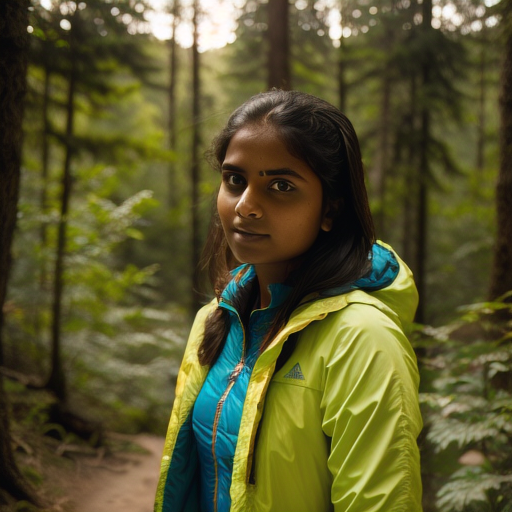

In [ ]:
image15

In [ ]:
result_image_path = os.path.join('./results/', "image15.jpg")
sr_image15= model.predict(np.array(image15))
sr_image15.save(result_image_path)
sr_image15

In [ ]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
import tensorflow as tf
import tensorflow_hub as hub
model = hub.load(SAVED_MODEL_PATH)
